In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from scipy import stats

%matplotlib inline

plt.figure(figsize=(20,30))

<Figure size 1440x2160 with 0 Axes>

<Figure size 1440x2160 with 0 Axes>

In [29]:
#plot esthetics
sickle = ["#C84E00", "#339898"]


In [30]:
TPMs = pd.read_csv("Data/Fig5_varDomains_counts.csv")
TPMs = TPMs.rename(index = str, columns = {"Unnamed: 0" : "Domain"})
TPMs.head()

,Domain,AA01,AA02,AA03,AA04,AA05,AA06,AA07,AA08,AA09,...,AS07,AS08,AS09,AS10,AS11,AS12,AS13,AS14,AS15,AS16
0,ATSA1_D10_HB3var06,9.874,37.119,507.745,41.013,51.557,62.969,66.650,109.102,28.347,...,8.464,5.231,3.708,0.000,0.000,73.245,31.892,5.707,93.635,569.331
1,ATSA1_D4_PFCLINvar34,4.077,12.654,0.000,14.643,4.343,3.310,0.000,0.000,27.905,...,0.000,0.000,0.000,0.000,127.863,56.977,0.000,92.440,14.961,0.000
2,ATSA1_D6_AAQ73927,5.273,23.016,0.000,0.000,127.671,23.661,142.135,2654.463,14.720,...,2.033,1739.032,5.523,3825.191,74.467,1259.068,32.169,0.000,306.000,256.912
3,ATSA1_D8_AAQ73928,33.578,113.854,394.903,66.714,87.558,9.450,237.882,3548.396,0.000,...,32.923,2836.138,0.000,2360.305,21.180,339.043,14.786,193.958,826.200,48.382
4,ATSA1_D8_IT4var60,5.208,47.651,276.899,16.231,6.775,58.391,189.146,11.112,1.711,...,9.686,1.589,2.453,9.854,5.218,52.514,64.394,46.580,216.041,143.856


In [31]:
mali_sampleTable = pd.read_csv("Data/Fig5_sampleTable.csv")

exp = TPMs.melt(id_vars=['Domain'] , var_name='Sample', value_name='Count')
exp = exp.merge(
    mali_sampleTable[['sampleName', 'Genotype', 'Stage']], 
    left_on='Sample', 
    right_on='sampleName', 
    how='inner')
exp.tail()

,Domain,Sample,Count,sampleName,Genotype,Stage
78843,NTSpam_D1_PFCLINvar35,AS16,0.0,AS16,AS,Trophozoite
78844,NTSpam_D1_PFCLINvar72,AS16,0.0,AS16,AS,Trophozoite
78845,NTSpam_D1_PFL0030c,AS16,0.0,AS16,AS,Trophozoite
78846,NTSpam_D1_PREICHvar64,AS16,0.0,AS16,AS,Trophozoite
78847,NTSpam_D1_RAJ116var25,AS16,0.0,AS16,AS,Trophozoite


In [32]:
#NTS group definition
exp.loc[exp['Domain'].str.contains('NTS'), 'NTStype'] = 'ABC'
exp.loc[exp['Domain'].str.contains('NTSA'), 'NTStype'] = 'A'
exp.loc[exp['Domain'].str.contains('NTSB'), 'NTStype'] = 'B'
exp.loc[exp['Domain'].str.contains('NTSC'), 'NTStype'] = 'C'
exp.loc[exp['Domain'].str.contains('NTSpam'), 'NTStype'] = 'pam'
exp["NTStype"].count()

10816

In [33]:
#CIDR group definition

exp.loc[exp['Domain'].str.contains('CIDRa1'), 'CIDRatype'] = 'CIDRa1'
#Run the following two lines if you want to discriminate between A and B/A CIDRa1s
exp.loc[exp['Domain'].str.contains('CIDRa1.1'), 'CIDRatype'] = 'CIDRa1.1/8'
exp.loc[exp['Domain'].str.contains('CIDRa1.8'), 'CIDRatype'] = 'CIDRa1.1/8'


exp.loc[exp['Domain'].str.contains('CIDRa2'), 'CIDRatype'] = 'CIDRa2-6'
exp.loc[exp['Domain'].str.contains('CIDRa3'), 'CIDRatype'] = 'CIDRa2-6'
exp.loc[exp['Domain'].str.contains('CIDRa4'), 'CIDRatype'] = 'CIDRa2-6'
exp.loc[exp['Domain'].str.contains('CIDRa5'), 'CIDRatype'] = 'CIDRa2-6'
exp.loc[exp['Domain'].str.contains('CIDRa6'), 'CIDRatype'] = 'CIDRa2-6'
exp.loc[exp['Domain'].str.contains('CIDRp'), 'CIDRatype'] = 'CIDRpam'

#CIDRa1type variable with CIDRa1s combined
exp.loc[exp['Domain'].str.contains('CIDRa1'), 'CIDRa1type'] = 'CIDRa1'
exp.loc[exp['Domain'].str.contains('CIDRa2'), 'CIDRa1type'] = 'CIDRa2-6'
exp.loc[exp['Domain'].str.contains('CIDRa3'), 'CIDRa1type'] = 'CIDRa2-6'
exp.loc[exp['Domain'].str.contains('CIDRa4'), 'CIDRa1type'] = 'CIDRa2-6'
exp.loc[exp['Domain'].str.contains('CIDRa5'), 'CIDRa1type'] = 'CIDRa2-6'
exp.loc[exp['Domain'].str.contains('CIDRa6'), 'CIDRa1type'] = 'CIDRa2-6'
exp.loc[exp['Domain'].str.contains('CIDRp'), 'CIDRa1type'] = 'CIDRpam'


In [34]:
#CIDRa1 subgroup  definition

exp.loc[exp['Domain'].str.contains('CIDRa1.1'), 'CIDRaSubtype'] = 'CIDRa1.1/8'
exp.loc[exp['Domain'].str.contains('CIDRa1.2'), 'CIDRaSubtype'] = 'CIDRa1.4-7'
exp.loc[exp['Domain'].str.contains('CIDRa1.3'), 'CIDRaSubtype'] = 'CIDRa1.3'
exp.loc[exp['Domain'].str.contains('CIDRa1.4'), 'CIDRaSubtype'] = 'CIDRa1.4-7'
exp.loc[exp['Domain'].str.contains('CIDRa1.5'), 'CIDRaSubtype'] = 'CIDRa1.4-7'
exp.loc[exp['Domain'].str.contains('CIDRa1.6'), 'CIDRaSubtype'] = 'CIDRa1.4-7'
exp.loc[exp['Domain'].str.contains('CIDRa1.7'), 'CIDRaSubtype'] = 'CIDRa1.4-7'
exp.loc[exp['Domain'].str.contains('CIDRa1.8'), 'CIDRaSubtype'] = 'CIDRa1.1/8'
exp.loc[exp['Domain'].str.contains('CIDRp'), 'CIDRaSubtype'] = 'CIDRpam'
exp.tail()

,Domain,Sample,Count,sampleName,Genotype,Stage,NTStype,CIDRatype,CIDRa1type,CIDRaSubtype
78843,NTSpam_D1_PFCLINvar35,AS16,0.0,AS16,AS,Trophozoite,pam,NaN,NaN,NaN
78844,NTSpam_D1_PFCLINvar72,AS16,0.0,AS16,AS,Trophozoite,pam,NaN,NaN,NaN
78845,NTSpam_D1_PFL0030c,AS16,0.0,AS16,AS,Trophozoite,pam,NaN,NaN,NaN
78846,NTSpam_D1_PREICHvar64,AS16,0.0,AS16,AS,Trophozoite,pam,NaN,NaN,NaN
78847,NTSpam_D1_RAJ116var25,AS16,0.0,AS16,AS,Trophozoite,pam,NaN,NaN,NaN


In [35]:
#Individual CIDR

exp.loc[exp['Domain'].str.contains('CIDRa1.1'), 'CIDRa'] = 'CIDRa1.1'
exp.loc[exp['Domain'].str.contains('CIDRa1.2'), 'CIDRa'] = 'CIDRa1.2'
exp.loc[exp['Domain'].str.contains('CIDRa1.3'), 'CIDRa'] = 'CIDRa1.3'
exp.loc[exp['Domain'].str.contains('CIDRa1.4'), 'CIDRa'] = 'CIDRa1.4'
exp.loc[exp['Domain'].str.contains('CIDRa1.5'), 'CIDRa'] = 'CIDRa1.5'
exp.loc[exp['Domain'].str.contains('CIDRa1.6'), 'CIDRa'] = 'CIDRa1.6'
exp.loc[exp['Domain'].str.contains('CIDRa1.7'), 'CIDRa'] = 'CIDRa1.7'
exp.loc[exp['Domain'].str.contains('CIDRa1.8'), 'CIDRa'] = 'CIDRa1.8'
exp.loc[exp['Domain'].str.contains('CIDRa2'), 'CIDRa'] = 'CIDRa2'
exp.loc[exp['Domain'].str.contains('CIDRa3'), 'CIDRa'] = 'CIDRa3'
exp.loc[exp['Domain'].str.contains('CIDRa4'), 'CIDRa'] = 'CIDRa4'
exp.loc[exp['Domain'].str.contains('CIDRa5'), 'CIDRa'] = 'CIDRa5'
exp.loc[exp['Domain'].str.contains('CIDRa6'), 'CIDRa'] = 'CIDRa6'
exp.loc[exp['Domain'].str.contains('CIDRp'), 'CIDRa'] = 'CIDRpam'
exp.head()
exp["CIDRa"].count()

12672

In [36]:
#DBLalpha group definition
exp.loc[exp['Domain'].str.contains('DBLa0'), 'DBLatype'] = 'DBLa0'
exp.loc[exp['Domain'].str.contains('DBLa1'), 'DBLatype'] = 'DBLa1'
exp.loc[exp['Domain'].str.contains('DBLa2'), 'DBLatype'] = 'DBLa2'

exp.loc[exp['Domain'].str.contains('DBLpam1'), 'DBLatype'] = 'DBLpam'


exp["DBLatype"].count()

11712

In [37]:
#DBLalpha group definition with 1/2 combined
exp.loc[exp['Domain'].str.contains('DBLa0'), 'DBLa1type'] = 'DBLa0'
exp.loc[exp['Domain'].str.contains('DBLa1'), 'DBLa1type'] = 'DBLa1/2'
exp.loc[exp['Domain'].str.contains('DBLa2'), 'DBLa1type'] = 'DBLa1/2'
exp.loc[exp['Domain'].str.contains('DBLpam1'), 'DBLa1type'] = 'DBLpam'

In [38]:
expCIDRa=exp[exp['Domain'].str.contains(pat='CIDRa')==True]
expDBLa=exp[exp['Domain'].str.contains(pat='DBLa')==True]

In [39]:
#SUM DBLa transcipts (change DBLatype to DBLa1type to combine a1 and a2): 

exp_agg = exp.groupby(['Genotype','Stage','Sample','DBLatype']).agg({'Count':sum})
#We group by the first level of the index:
g = exp_agg['Count'].groupby(level=2, group_keys=False)
DBLaSUM=g.nlargest(100)
DBLaSUM=DBLaSUM.reset_index()

#SUM CIDRSubtype transcipts: 

exp_agg = exp.groupby(['Genotype','Stage','Sample','CIDRatype']).agg({'Count':sum})
#We group by the second level of the index:
g = exp_agg['Count'].groupby(level=2, group_keys=False)
CIDRatypeSUM=g.nlargest(100)
CIDRatypeSUM=CIDRatypeSUM.reset_index()

#Extracting Sum of the ATS transcripts: 
#ATS group definition
exp.loc[exp['Domain'].str.contains('ATS'), 'ATStype'] = 'ATS'
exp_agg = exp.groupby(['Genotype','Sample','ATStype']).agg({'Count':sum})
#We group by the first level of the index:
g = exp_agg['Count'].groupby(level=1, group_keys=False)
ATSSUM=g.nlargest(100)
ATSSUM=ATSSUM.reset_index()



#Extracting the NTS transcripts sum for each sample: 

exp_agg = exp.groupby(['Genotype','Sample','NTStype']).agg({'Count':sum})
#We group by the first level of the index:
g = exp_agg['Count'].groupby(level=1, group_keys=False)
NTSSUM=g.nlargest(10)
NTSSUM=NTSSUM.reset_index()



In [40]:
#Normalize counts to ATS sum

#NTS
NTSNormalized=pd.merge(ATSSUM, NTSSUM, on='Sample', how='inner')
NTSNormalized['CountN']=NTSNormalized["Count_y"]/NTSNormalized['Count_x']*100
NTSSUM['CountN']=NTSNormalized['CountN']
NTSSUM.to_csv("Data/S2FIG_NTS.csv")

#DBL
DBLNormalized=pd.merge(ATSSUM, DBLaSUM, on='Sample', how='inner')
DBLNormalized['CountN']=DBLNormalized["Count_y"]/DBLNormalized['Count_x']*100
DBLaSUM["CountN"]=DBLNormalized['CountN']
DBLaSUM.to_csv("Data/Fig5_DBLa.csv")
#CIDRa
CIDRNormalized=pd.merge(ATSSUM, CIDRatypeSUM, on='Sample', how='inner')
CIDRNormalized['CountN']=CIDRNormalized["Count_y"]/CIDRNormalized['Count_x']*100
CIDRatypeSUM["CountN"]=CIDRNormalized['CountN']
CIDRatypeSUM.to_csv("Data/Fig5_CIDRa.csv.csv")


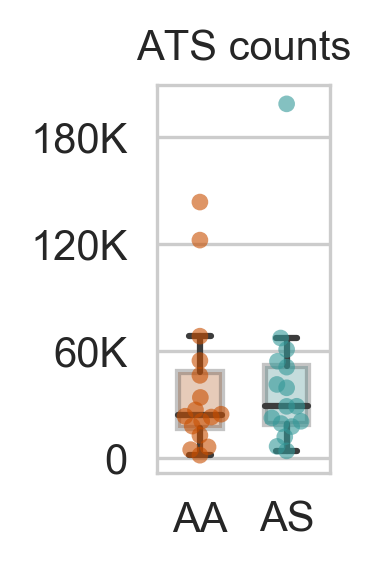

In [41]:
# Define the nice number formatter
def number_formatter(number, pos=None):
    """Convert larger number into a human readable format."""
    magnitude = 0
    while abs(number) >= 1000:
        magnitude += 1
        number /= 1000
    return '%.f%s' % (number, ['', 'K', 'M', 'B', 'T', 'Q'][magnitude])

sns.set_style('whitegrid')
plt.figure(figsize=(1.3,2),dpi=300)
ax1=sns.swarmplot(x="Genotype", y="Count", data=ATSSUM,dodge=False,size=4,palette = sns.color_palette(sickle),alpha=0.6)
ax1=sns.boxplot(x="Genotype", y="Count", data=ATSSUM,dodge=False,width=0.5,palette = sns.color_palette(sickle),boxprops=dict(alpha=.3),showfliers = False)
ax1.set_title("ATS counts",size=10)

ax1.set(xlabel="")
ax1.set(ylabel="")

ax1.yaxis.set_major_locator(plt.MaxNLocator(4,integer=True))
#ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda y, loc: "{:,}".format(int(y))))

ax1.yaxis.set_major_formatter(FuncFormatter(number_formatter))
plt.tight_layout()
plt.savefig('Figs/ATS.pdf')

In [42]:
cat1 = ATSSUM[ATSSUM['Genotype']=='AA']
cat2 = ATSSUM[ATSSUM['Genotype']=='AS']

stats.ttest_ind(cat1['Count'], cat2['Count'])

Ttest_indResult(statistic=-0.1720405523393426, pvalue=0.8645609760530735)

In [43]:
ATSSUM.groupby(["Genotype"]).mean()

,Count
Genotype,
AA,39590.312688
AS,42235.312250


In [44]:
np.percentile(cat1['Count'],[2.5,50,97.5])

array([  2887.124125,  24161.0005  , 135759.120625])

In [45]:
np.std(cat1)

Count    39556.92384
dtype: float64

In [46]:
np.percentile(cat2['Count'],[2.5,50,97.5])

array([  5095.752875,  29152.4975  , 149596.75125 ])

In [47]:
np.std(cat2)

Count    44505.919796
dtype: float64

In [48]:
stats.wilcoxon(cat1['Count'], cat2['Count'])

WilcoxonResult(statistic=59.0, pvalue=0.6416601266046645)

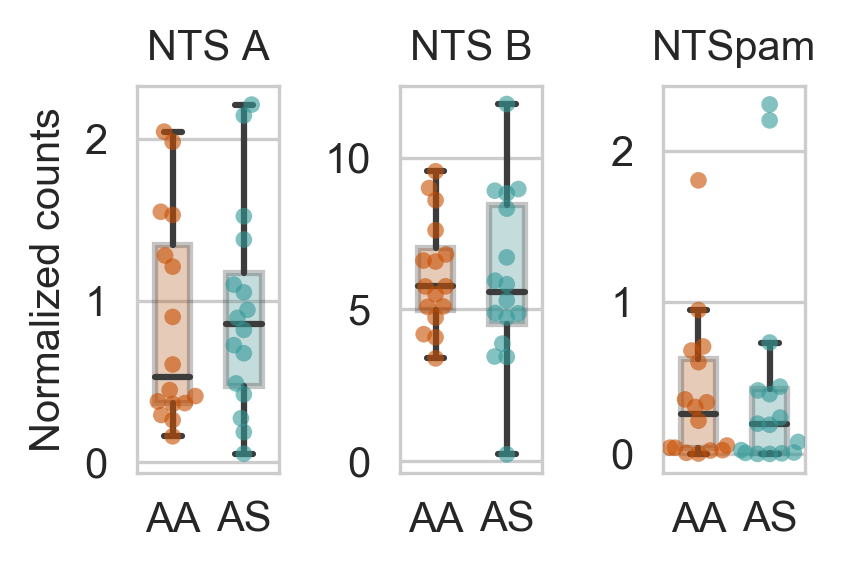

In [49]:
#NTS
fig, axs = plt.subplots(1, 3,figsize=(3,2),dpi=300)

ax1=sns.swarmplot(ax=axs[0],x="Genotype", y="CountN", data=NTSSUM[(NTSSUM["NTStype"]=="A")],palette = sns.color_palette(sickle),dodge=False,size=4,alpha=0.6)
ax1=sns.boxplot(ax=axs[0],x="Genotype", y="CountN", data=NTSSUM[(NTSSUM["NTStype"]=="A")],dodge=False,width=0.5,palette = sns.color_palette(sickle),boxprops=dict(alpha=.3), showfliers = False)
ax1.set_title("NTS A",size=10)
ax1.set(ylabel="Normalized counts")

ax2=sns.swarmplot(ax=axs[1],x="Genotype", y="CountN", data=NTSSUM[(NTSSUM["NTStype"]=="B")],palette=sns.color_palette(sickle),dodge=False,size=4,alpha=0.6)
ax2=sns.boxplot(ax=axs[1],x="Genotype", y="CountN", data=NTSSUM[(NTSSUM["NTStype"]=="B")],dodge=False,width=0.5,palette = sns.color_palette(sickle),boxprops=dict(alpha=.3), showfliers = False)
handles, labels = ax2.get_legend_handles_labels()
ax2.set_title("NTS B",size=10) 
ax2.set(ylabel="")

ax3=sns.swarmplot(ax=axs[2],x="Genotype", y="CountN", data=NTSSUM[(NTSSUM["NTStype"]=="pam")],palette = sns.color_palette(sickle),dodge=False,size=4,alpha=0.6)
ax3=sns.boxplot(ax=axs[2],x="Genotype", y="CountN", data=NTSSUM[(NTSSUM["NTStype"]=="pam")],dodge=False,width=0.5,palette = sns.color_palette(sickle),boxprops=dict(alpha=.3), showfliers = False)
ax3.set_title("NTSpam",size=10) 
ax3.set(ylabel="")

ax1.set(xlabel="")
ax2.set(xlabel="")
ax3.set(xlabel="")


plt.tight_layout()
plt.savefig('Figs/NTS.pdf')

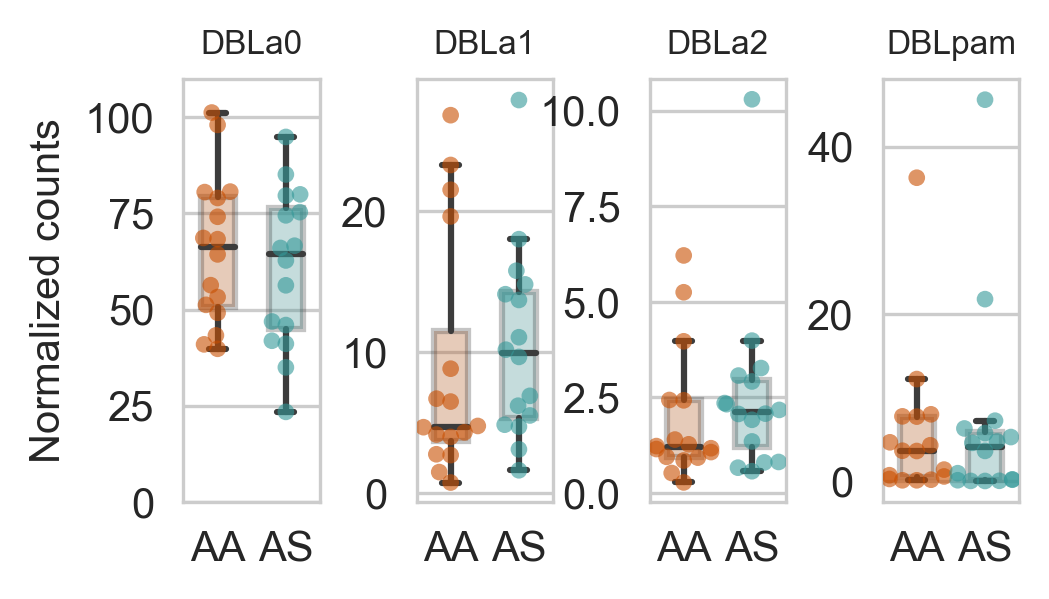

In [50]:
#DBL

fig, axs = plt.subplots(1, 4,figsize=(3.3,1.8),dpi=300)

ax1=sns.swarmplot(ax=axs[0],x="Genotype", y="CountN", data=DBLaSUM[(DBLaSUM["DBLatype"]=="DBLa0")],palette=sns.color_palette(sickle),dodge=False,size=4,alpha=.6)
ax1=sns.boxplot(ax=axs[0],x="Genotype", y="CountN", data=DBLaSUM[(DBLaSUM["DBLatype"]=="DBLa0")],dodge=False,width=0.5,palette = sns.color_palette(sickle),boxprops=dict(alpha=.3), showfliers = False)
ax1.set_title("DBLa0",size=8)
ax1.set(ylabel="Normalized counts",ylim=(0,110))


ax2=sns.swarmplot(ax=axs[1],x="Genotype", y="CountN", data=DBLaSUM[(DBLaSUM["DBLatype"]=="DBLa1")],palette=sns.color_palette(sickle),dodge=False,size=4,alpha=.6)
ax2=sns.boxplot(ax=axs[1],x="Genotype", y="CountN", data=DBLaSUM[(DBLaSUM["DBLatype"]=="DBLa1")],dodge=False,width=0.5,palette = sns.color_palette(sickle),boxprops=dict(alpha=.3), showfliers = False)
ax2.set_title("DBLa1",size=8) 
ax2.set(ylabel="")

ax3=sns.swarmplot(ax=axs[2],x="Genotype", y="CountN", data=DBLaSUM[(DBLaSUM["DBLatype"]=="DBLa2")],palette=sns.color_palette(sickle),dodge=False,size=4,alpha=.6)
ax3=sns.boxplot(ax=axs[2],x="Genotype", y="CountN", data=DBLaSUM[(DBLaSUM["DBLatype"]=="DBLa2")],dodge=False,width=0.5,palette = sns.color_palette(sickle),boxprops=dict(alpha=.3), showfliers = False)
ax3.set_title("DBLa2",size=8) 
ax3.set(ylabel="")

ax4=sns.swarmplot(ax=axs[3],x="Genotype", y="CountN", data=DBLaSUM[(DBLaSUM["DBLatype"]=="DBLpam")],palette=sns.color_palette(sickle),dodge=False,size=4,alpha=.6)
ax4=sns.boxplot(ax=axs[3],x="Genotype", y="CountN", data=DBLaSUM[(DBLaSUM["DBLatype"]=="DBLpam")],dodge=False,width=0.5,palette = sns.color_palette(sickle),boxprops=dict(alpha=.3), showfliers = False)
ax4.set_title("DBLpam",size=8) 
ax4.set(ylabel="")

ax1.set(xlabel="")
ax2.set(xlabel="")
ax3.set(xlabel="")
ax4.set(xlabel="")
plt.tight_layout(pad=.01,w_pad=.5)

plt.savefig('Figs/DBLa.pdf')


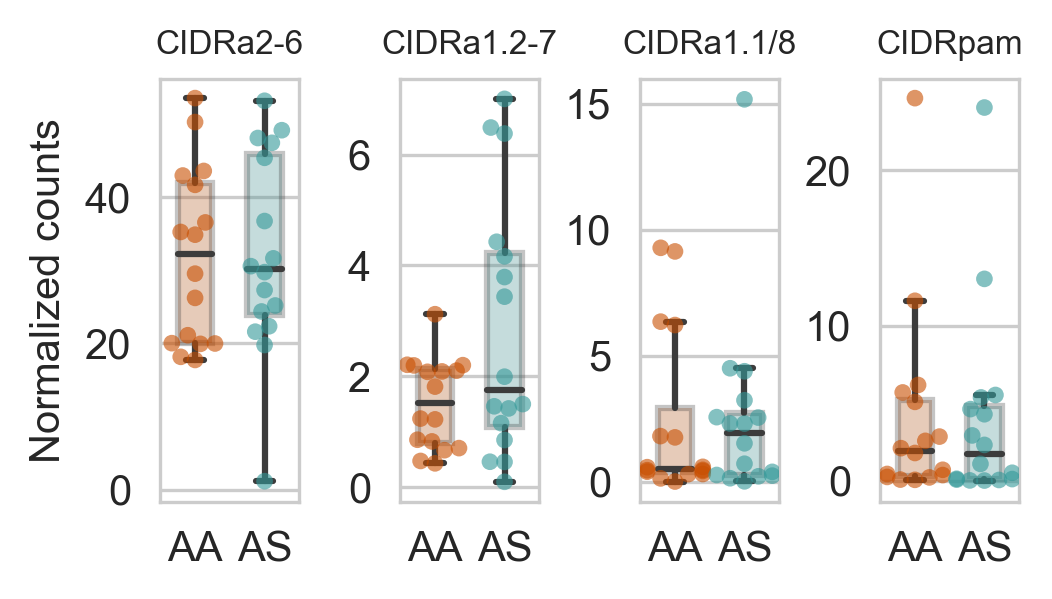

In [51]:
fig, axs = plt.subplots(1, 4,figsize=(3.3,1.8),dpi=300)


ax1=sns.swarmplot(ax=axs[0],x="Genotype", y="CountN", data=CIDRatypeSUM[(CIDRatypeSUM["CIDRatype"]=="CIDRa2-6")],palette=sns.color_palette(sickle),dodge=False,size=4,alpha=.6)
ax1=sns.boxplot(ax=axs[0],x="Genotype", y="CountN", data=CIDRatypeSUM[(CIDRatypeSUM["CIDRatype"]=="CIDRa2-6")],dodge=False,width=0.5,palette = sns.color_palette(sickle),boxprops=dict(alpha=.3), showfliers = False)
ax1.set_title("CIDRa2-6",size=8) 
ax1.set(ylabel="Normalized counts")
ax1.set(xlabel="")

ax2=sns.swarmplot(ax=axs[1],x="Genotype", y="CountN", data=CIDRatypeSUM[(CIDRatypeSUM["CIDRatype"]=="CIDRa1")],palette=sns.color_palette(sickle),dodge=False,size=4,alpha=.6)
ax2=sns.boxplot(ax=axs[1],x="Genotype", y="CountN",data=CIDRatypeSUM[(CIDRatypeSUM["CIDRatype"]=="CIDRa1")],dodge=False,width=0.5,palette = sns.color_palette(sickle),boxprops=dict(alpha=.3), showfliers = False)
ax2.set_title("CIDRa1.2-7",size=8) 
ax2.set(ylabel="")
ax2.set(xlabel="")

ax3=sns.swarmplot(ax=axs[2],x="Genotype", y="CountN", data=CIDRatypeSUM[(CIDRatypeSUM["CIDRatype"]=="CIDRa1.1/8")],palette=sns.color_palette(sickle),dodge=False,size=4,alpha=.6)
ax3=sns.boxplot(ax=axs[2],x="Genotype", y="CountN",data=CIDRatypeSUM[(CIDRatypeSUM["CIDRatype"]=="CIDRa1.1/8")],dodge=False,width=0.5,palette = sns.color_palette(sickle),boxprops=dict(alpha=.3), showfliers = False)
ax3.set_title("CIDRa1.1/8",size=8) 
ax3.set(ylabel="")
ax3.set(xlabel="")

ax4=sns.swarmplot(ax=axs[3],x="Genotype", y="CountN", data=CIDRatypeSUM[(CIDRatypeSUM["CIDRatype"]=="CIDRpam")],palette=sns.color_palette(sickle),dodge=False,size=4,alpha=.6)
ax4=sns.boxplot(ax=axs[3],x="Genotype", y="CountN",data=CIDRatypeSUM[(CIDRatypeSUM["CIDRatype"]=="CIDRpam")],dodge=False,width=0.5,palette = sns.color_palette(sickle),boxprops=dict(alpha=.3), showfliers = False)
ax4.set(ylabel="")
ax4.set_title("CIDRpam",size=8) 
ax4.set(xlabel="")


plt.tight_layout(pad=.01,w_pad=.5)
plt.savefig('Figs/CIDRa.pdf')

In [52]:
#Other domains
exp.loc[exp['Domain'].str.contains('CIDRa'), 'CIDR2'] = 'CIDRa'
exp.loc[exp['Domain'].str.contains('CIDRb'), 'CIDR2'] = 'CIDRb'
exp.loc[exp['Domain'].str.contains('CIDRg'), 'CIDR2'] = 'CIDRg'
exp.loc[exp['Domain'].str.contains('CIDRd'), 'CIDR2'] = 'CIDRd'
exp.loc[exp['Domain'].str.contains('CIDRpam'), 'CIDR2'] = 'CIDRpam'


#CIDR2

expCIDR2=exp[exp['Domain'].str.contains(pat='CIDRa')==True]

#SUM CIDRSubtype transcipts: 

exp_agg = exp.groupby(['Genotype','Stage','Sample','CIDR2']).agg({'Count':sum})
#We group by the first level of the index:
g = exp_agg['Count'].groupby(level=2, group_keys=False)
CIDR2SUM=g.nlargest(1000)
CIDR2SUM=CIDR2SUM.reset_index()


CIDR2Normalized=pd.merge(ATSSUM, CIDR2SUM, on='Sample', how='inner')
CIDR2Normalized['CountN']=CIDR2Normalized["Count_y"]/CIDR2Normalized['Count_x']*100
CIDR2SUM["CountN"]=CIDR2Normalized['CountN']
CIDR2SUM.to_csv("Data/CIDR2SUM.csv")

#DBLbetas2 and 3
exp.loc[exp['Domain'].str.contains('DBLb'), 'DBLbtype'] = 'DBLb'
exp.loc[exp['Domain'].str.contains('DBLb0'), 'DBLbtype'] = 'DBLb0'
exp.loc[exp['Domain'].str.contains('DBLb1'), 'DBLbtype'] = 'DBLb1'
exp.loc[exp['Domain'].str.contains('DBLb2'), 'DBLbtype'] = 'DBLb2'
exp.loc[exp['Domain'].str.contains('DBLb3'), 'DBLbtype'] = 'DBLb3'
exp.loc[exp['Domain'].str.contains('DBLb4'), 'DBLbtype'] = 'DBLb4'
exp.loc[exp['Domain'].str.contains('DBLb5'), 'DBLbtype'] = 'DBLb5'
#DBL types
exp.loc[exp['Domain'].str.contains('DBLa'), 'DBL'] = 'DBLa'
exp.loc[exp['Domain'].str.contains('DBLb'), 'DBL'] = 'DBLb'
exp.loc[exp['Domain'].str.contains('DBLy'), 'DBL'] = 'DBLy'
exp.loc[exp['Domain'].str.contains('DBLd'), 'DBL'] = 'DBLd'
exp.loc[exp['Domain'].str.contains('DBLe'), 'DBL'] = 'DBLe'
exp.loc[exp['Domain'].str.contains('DBLg'), 'DBL'] = 'DBLg'
exp.loc[exp['Domain'].str.contains('DBLz'), 'DBL'] = 'DBLz'
exp.loc[exp['Domain'].str.contains('DBLpam'), 'DBL'] = 'DBLpam'

exp_agg = exp.groupby(['Genotype','Stage','Sample','DBL']).agg({'Count':sum})
#We group by the first level of the index:
g = exp_agg['Count'].groupby(level=2, group_keys=False)
DBLSUM=g.nlargest(1000)
DBLSUM=DBLSUM.reset_index()


DBLNormalized=pd.merge(ATSSUM, DBLSUM, on='Sample', how='inner')
DBLNormalized['CountN']=DBLNormalized["Count_y"]/DBLNormalized['Count_x']*100
DBLSUM["CountN"]=DBLNormalized['CountN']
DBLNormalized.to_csv("Data/DBLNormalized.csv")

#SUM DBLb transcipts: 

exp_agg = exp.groupby(['Genotype','Stage','Sample','DBLbtype']).agg({'Count':sum})
#We group by the first level of the index:
g = exp_agg['Count'].groupby(level=2, group_keys=False)
DBLBSUM=g.nlargest(1000)
DBLBSUM=DBLBSUM.reset_index()


DBLBNormalized=pd.merge(ATSSUM, DBLBSUM, on='Sample', how='inner')
DBLBNormalized['CountN']=DBLBNormalized["Count_y"]/DBLBNormalized['Count_x']*100
DBLBSUM["CountN"]=DBLBNormalized['CountN']
DBLBNormalized.to_csv("Data/DBLBNormalized.csv")


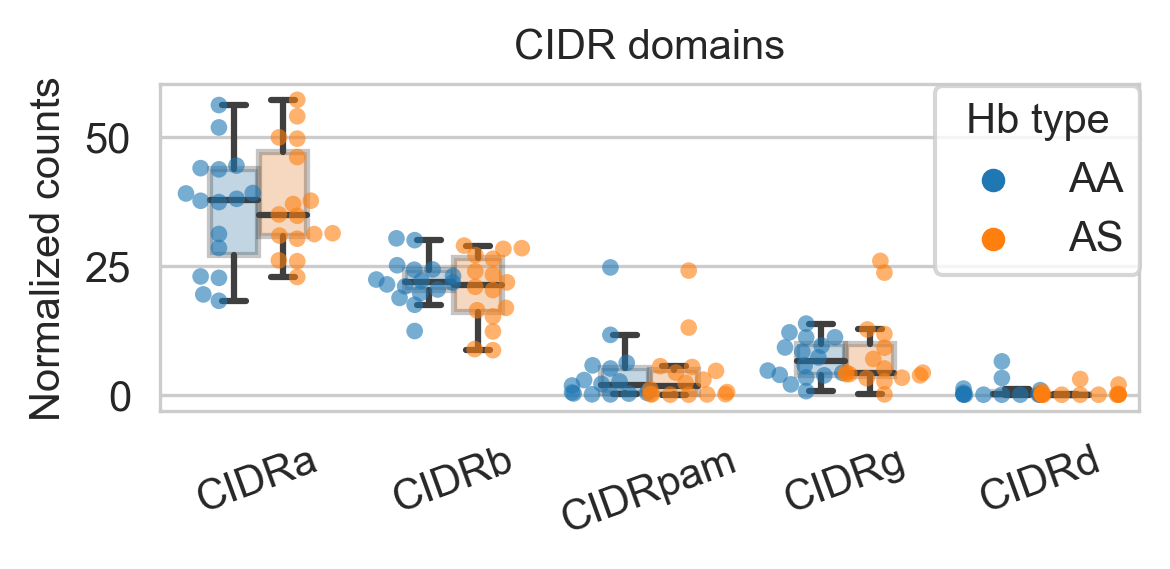

In [53]:
#Supplementary figure of CIDR domain transcription
plt.figure(figsize=(4,2),dpi=300)
ax1=sns.swarmplot(x="CIDR2", y="CountN", data=CIDR2SUM,dodge=True,size=4,hue="Genotype",alpha=0.6)
ax1=sns.boxplot(x="CIDR2", y="CountN", data=CIDR2SUM,dodge=True,width=0.5,hue="Genotype",boxprops=dict(alpha=.3),showfliers = False)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=20)
ax1.set_title("CIDR domains",size=10)
ax1.set_xlabel('')
ax1.set_ylabel('Normalized counts')
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[2:], labels[2:],title="Hb type",
          frameon=True, bbox_to_anchor=(1.01, 1.02), borderaxespad=0.2,markerscale=.6)
plt.tight_layout()
plt.savefig('Figs/SuppCIDR.pdf')


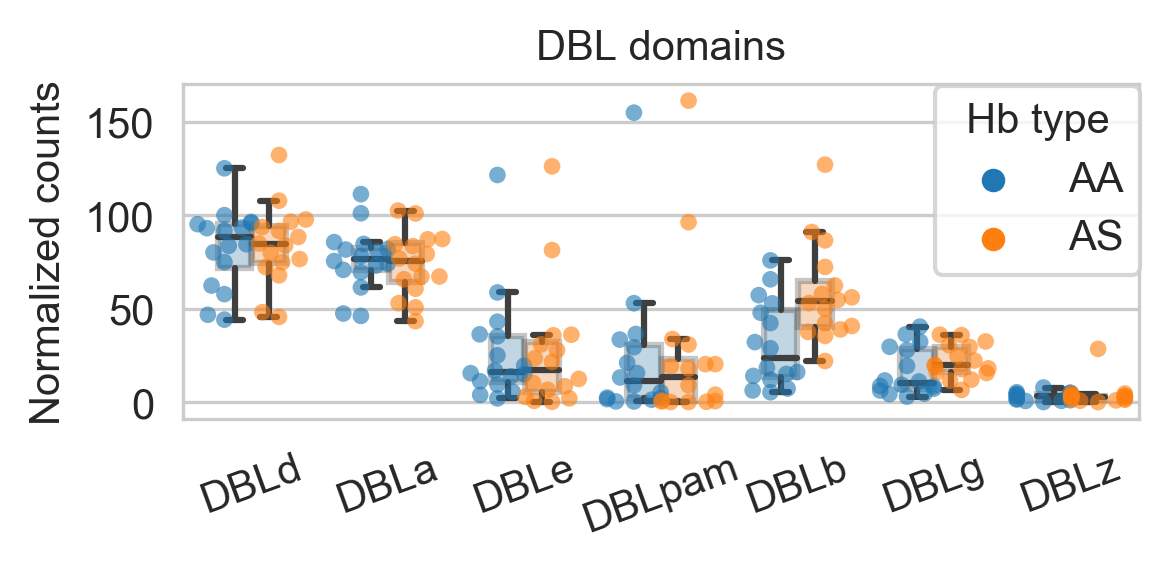

In [54]:
#Supplementary figure of DBL domain transcription
plt.figure(figsize=(4,2),dpi=300)
ax1=sns.swarmplot(x="DBL", y="CountN", data=DBLSUM,dodge=True,size=4,hue="Genotype",alpha=0.6)
ax1=sns.boxplot(x="DBL", y="CountN", data=DBLSUM,dodge=True,width=0.5,hue="Genotype",boxprops=dict(alpha=.3),showfliers = False)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=20)
ax1.set_title("DBL domains",size=10)
ax1.set_xlabel('')
ax1.set_ylabel('Normalized counts')
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[2:], labels[2:],title="Hb type",
          frameon=True, bbox_to_anchor=(1.01, 1.02), borderaxespad=0.2,markerscale=.6)

plt.tight_layout()
plt.savefig('Figs/SuppDBL.pdf')